# Imports and Options

In [1]:
# Imports
import pandas as pd
import numpy as np
from fuzzywuzzy import fuzz
from IPython.display import clear_output
import seaborn as sns
import timeit
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from scipy.stats import mstats
from featexp import get_univariate_plots, get_trend_stats
from sklearn.model_selection import train_test_split
from pandasql import sqldf

# Options
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
%matplotlib inline


/Users/petermyers/Desktop/Code/commons/venv/lib/python3.6/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


# Reading Data

In [2]:
column_dtypes = {   'ProductName': 'category',
                    'EngineVersion': 'category',
                    'AppVersion': 'category',
                    'AvSigVersion': 'category',
                    'Platform': 'category',
                    'Processor': 'category',
                    'OsVer': 'category',
                    'OsPlatformSubRelease': 'category',
                    'OsBuildLab': 'category',
                    'SkuEdition': 'category',
                    'PuaMode': 'category',
                    'SmartScreen': 'category',
                    'Census_MDC2FormFactor': 'category',
                    'Census_DeviceFamily': 'category',
                    'Census_ProcessorClass': 'category',
                    'Census_PrimaryDiskTypeName': 'category',
                    'Census_ChassisTypeName': 'category',
                    'Census_PowerPlatformRoleName': 'category',
                    'Census_InternalBatteryType': 'category',
                    'Census_OSVersion': 'category',
                    'Census_OSArchitecture': 'category',
                    'Census_OSBranch': 'category',
                    'Census_OSEdition': 'category',
                    'Census_OSSkuName': 'category',
                    'Census_OSInstallTypeName': 'category',
                    'Census_OSWUAutoUpdateOptionsName': 'category',
                    'Census_GenuineStateName': 'category',
                    'Census_ActivationChannel': 'category',
                    'Census_FlightRing': 'category',
                    'DefaultBrowsersIdentifier': 'category',
                    'AVProductStatesIdentifier': 'category',
                    'CountryIdentifier': 'category',
                    'CityIdentifier': 'category',
                    'OrganizationIdentifier': 'category',
                    'GeoNameIdentifier': 'category',
                    'LocaleEnglishNameIdentifier': 'category',
                    'IeVerIdentifier': 'category',
                    'Census_OEMNameIdentifier': 'category',
                    'Census_OEMModelIdentifier': 'category',
                    'Census_ProcessorManufacturerIdentifier': 'category',
                    'Census_ProcessorModelIdentifier': 'category',
                    'Census_OSInstallLanguageIdentifier': 'category',
                    'Census_OSUILocaleIdentifier': 'category',
                    'Census_FirmwareManufacturerIdentifier': 'category',
                    'Census_FirmwareVersionIdentifier': 'category',
                    'Wdft_RegionIdentifier': 'category'
                }

# Read in training set
print("Read in training set")
df = pd.read_csv("data/train.csv",dtype=column_dtypes) # exploration.csv for a smaller dataset

# Get int and floats
print("Get int and floats")
converted_int = df.select_dtypes(include=['int'])
converted_float = df.select_dtypes(include=['float'])

# Downcast ints and floats
print("Downcast ints and floats")
df[converted_int.columns] = converted_int.apply(pd.to_numeric,downcast='signed')
df[converted_float.columns] = converted_float.apply(pd.to_numeric,downcast='float')


Read in training set
Get int and floats
Downcast ints and floats


# FeatExp

## References

- https://towardsdatascience.com/my-secret-sauce-to-be-in-top-2-of-a-kaggle-competition-57cff0677d3c

## Feature Understanding

In [6]:
number_columns=list(df.select_dtypes('number').columns)

In [7]:
@interact
def univariate(x=number_columns):
    get_univariate_plots(data=df, target_col='HasDetections', 
                         features_list=[x], bins=10)

interactive(children=(Dropdown(description='x', options=('IsBeta', 'RtpStateBitfield', 'IsSxsPassiveMode', 'AV…

## Split Data

In [9]:
# Randomly
# train, test = train_test_split(df, test_size=0.2, random_state=42)

# Ordered
_80_percent = int(df.shape[0] * .80)
train, test = df.iloc[0:_80_percent], df.iloc[_80_percent:]
train.shape, test.shape

((7137186, 83), (1784297, 83))

## Identifying Noisy Features

In [10]:
# df[number_columns].describe()

In [11]:
@interact
def univariate(x=number_columns):
    get_univariate_plots(data=df, target_col='HasDetections', 
                         data_test=test, features_list=[x], bins=10)
    

interactive(children=(Dropdown(description='x', options=('IsBeta', 'RtpStateBitfield', 'IsSxsPassiveMode', 'AV…

# Seaborn Exploratory Data Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1470b0160>,
      dtype=object)

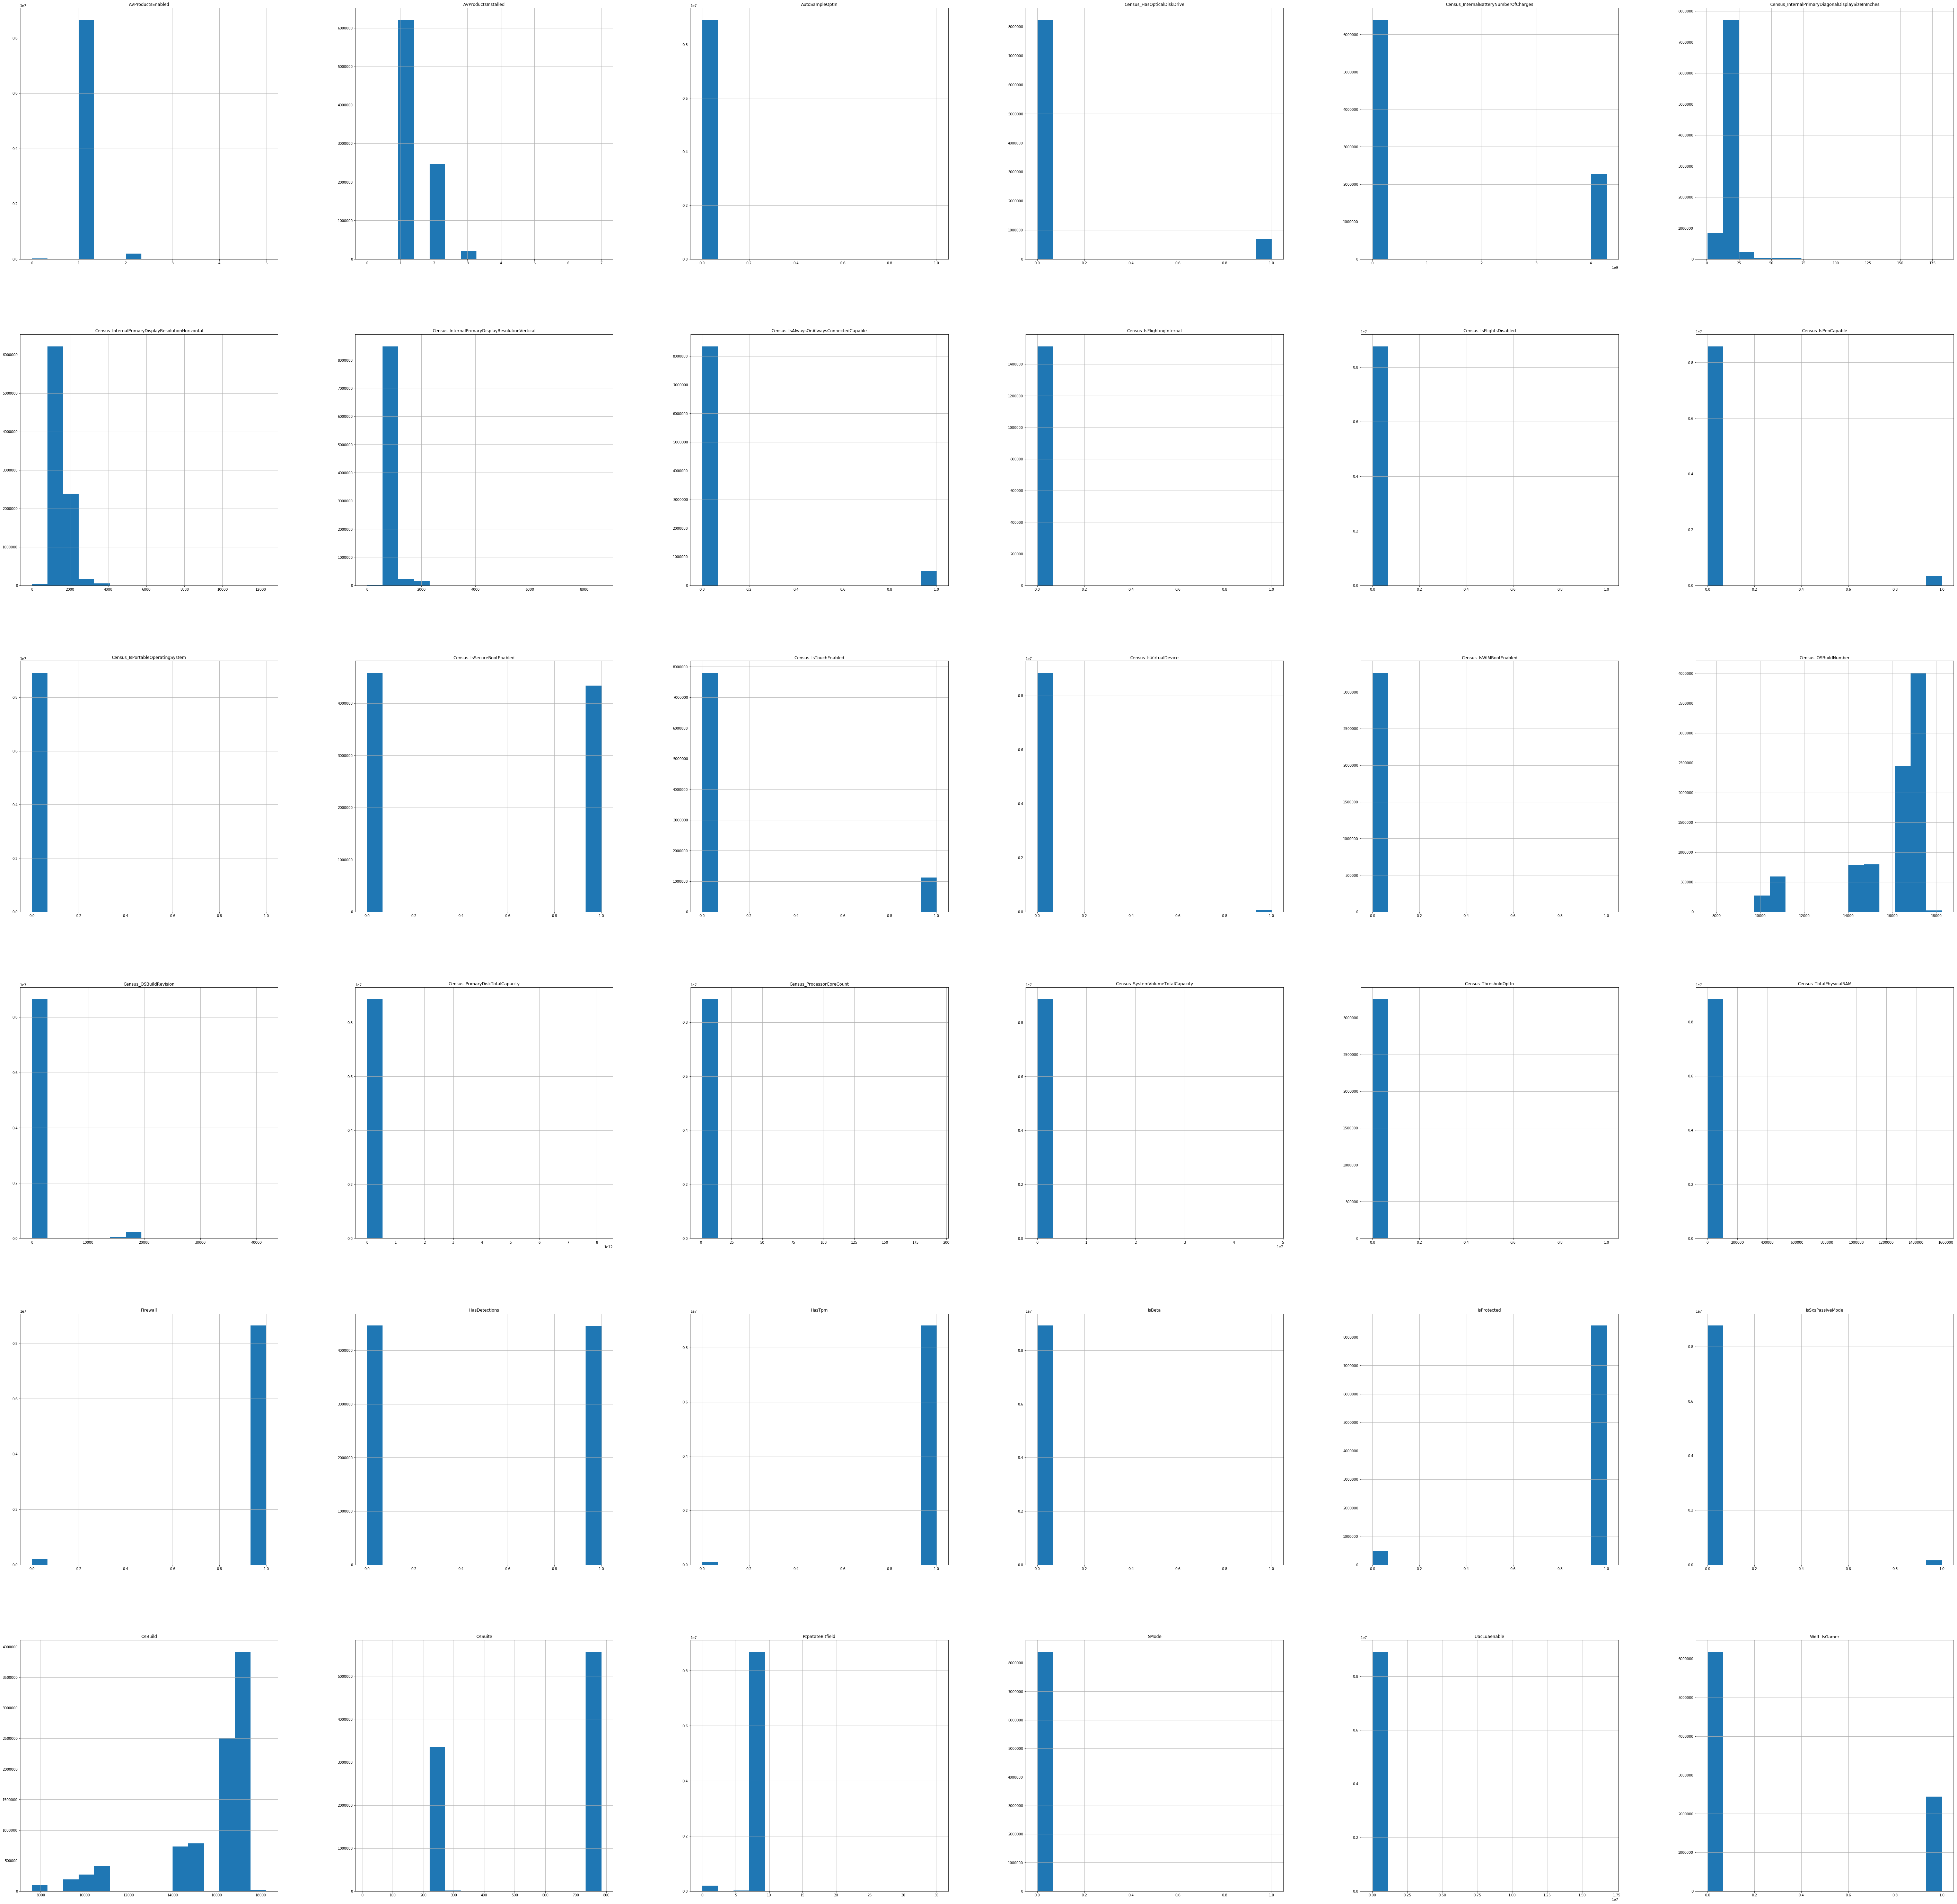

In [12]:
df.select_dtypes('number').hist(bins=15, figsize=(100, 100))


/Users/petermyers/Desktop/Code/commons/venv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


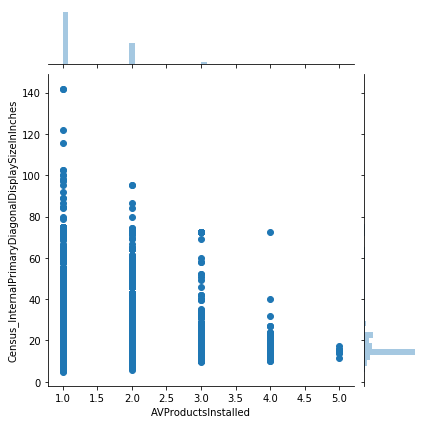

In [4]:
# sns.jointplot(x=df['AVProductsInstalled'], y=df['Census_InternalPrimaryDiagonalDisplaySizeInInches'])
